# Geometric Brownian Motion

## The Foundation: 

At the heart of our financial modeling lies Brownian motion, a continuous-time stochastic process that serves as the building block for more sophisticated models. Let's understand why this is fundamental to financial mathematics.

### Properties of Brownian Motion

A process $W(t)$ is called a Brownian motion (or Wiener process) if:

1. The increments are stationary and independent:
   $W(t) - W(s)$ is independent of $W(s) - W(r)$ for $r < s < t$

2. For any time $t$, the increment follows a normal distribution:
   $W(t) - W(s) \sim N(0, t-s)$

3. The paths are continuous:
   $\lim_{h \to 0} W(t+h) = W(t)$ with probability 1

## From Brownian Motion to Geometric Brownian Motion

### The Intuition

Why do we need to modify Brownian motion for financial modeling? Consider these empirical observations about stock prices:

1. Price changes tend to be proportional to the current price
2. Prices must remain positive
3. Returns (percentage changes) appear to be roughly normally distributed

These observations lead us to model the logarithm of prices, rather than prices themselves.

### Mathematical Construction

The Geometric Brownian Motion (GBM) model proposes that stock prices follow:

$$ dS = \mu S dt + \sigma S dW $$

where:
- $S$ is the stock price
- $\mu$ is the drift (expected return)
- $\sigma$ is the volatility
- $dW$ is the increment of a Brownian motion

### The Solution Process

Using Itô's lemma, we can solve this stochastic differential equation. Let $X = \ln(S)$. Then:

$$ X(t) = X(0) + (\mu - \frac{\sigma^2}{2})t + \sigma W(t) $$

Therefore:

$$ S(t) = S(0)\exp\left((\mu - \frac{\sigma^2}{2})t + \sigma W(t)\right) $$

## Statistical Properties

### Distribution of Returns

The log-returns over an interval $[s,t]$ are:

$$ \ln\left(\frac{S(t)}{S(s)}\right) \sim N\left((\mu - \frac{\sigma^2}{2})(t-s), \sigma^2(t-s)\right) $$

This means the stock price itself follows a lognormal distribution.

### Expected Values and Moments

1. Expected Stock Price:
   $$ \mathbb{E}[S(t)] = S(0)e^{\mu t} $$

2. Variance:
   $$ \text{Var}[S(t)] = S(0)^2e^{2\mu t}(e^{\sigma^2 t} - 1) $$

3. Mode of the lognormal distribution:
   $$ \text{Mode}[S(t)] = S(0)e^{(\mu - \sigma^2)t} $$

## The Role of Parameters

### Drift Parameter ($\mu$)

The drift represents the average rate of return investors demand for holding the stock:
- Higher $\mu$ shifts the distribution rightward
- It affects the mean more than the median
- In risk-neutral pricing, we replace $\mu$ with the risk-free rate $r$

### Volatility Parameter ($\sigma$)

Volatility determines the spread of possible outcomes:
- Higher $\sigma$ increases the variance of returns
- It affects both upside and downside potential
- The $-\frac{\sigma^2}{2}$ term in the drift adjusts for Itô's correction

## Time Scaling Properties

A crucial feature of GBM is how its parameters scale with time:

1. Expected return scales linearly with time:
   $\mu t$

2. Volatility scales with the square root of time:
   $\sigma \sqrt{t}$

This explains why:
- Short-term price changes are dominated by volatility
- Long-term price changes are more influenced by drift

## Martingale Properties

Under the risk-neutral measure $\mathbb{Q}$, the discounted stock price is a martingale:

$$ \mathbb{E}^\mathbb{Q}\left[\frac{S(t)}{B(t)}\Big|\mathcal{F}_s\right] = \frac{S(s)}{B(s)} $$

where $B(t) = e^{rt}$ is the money market account.

## Model Limitations

Understanding the limitations helps us appreciate when more sophisticated models are needed:

1. Constant Parameters:
   - Real market volatility varies over time
   - Expected returns may change with economic conditions

2. Continuous Paths:
   - Market prices can jump
   - News can cause discontinuous changes

3. Normal Distribution of Returns:
   - Actual returns show fatter tails
   - Extreme events occur more frequently than predicted

These limitations motivate the development of more sophisticated models, such as stochastic volatility and jump-diffusion models.

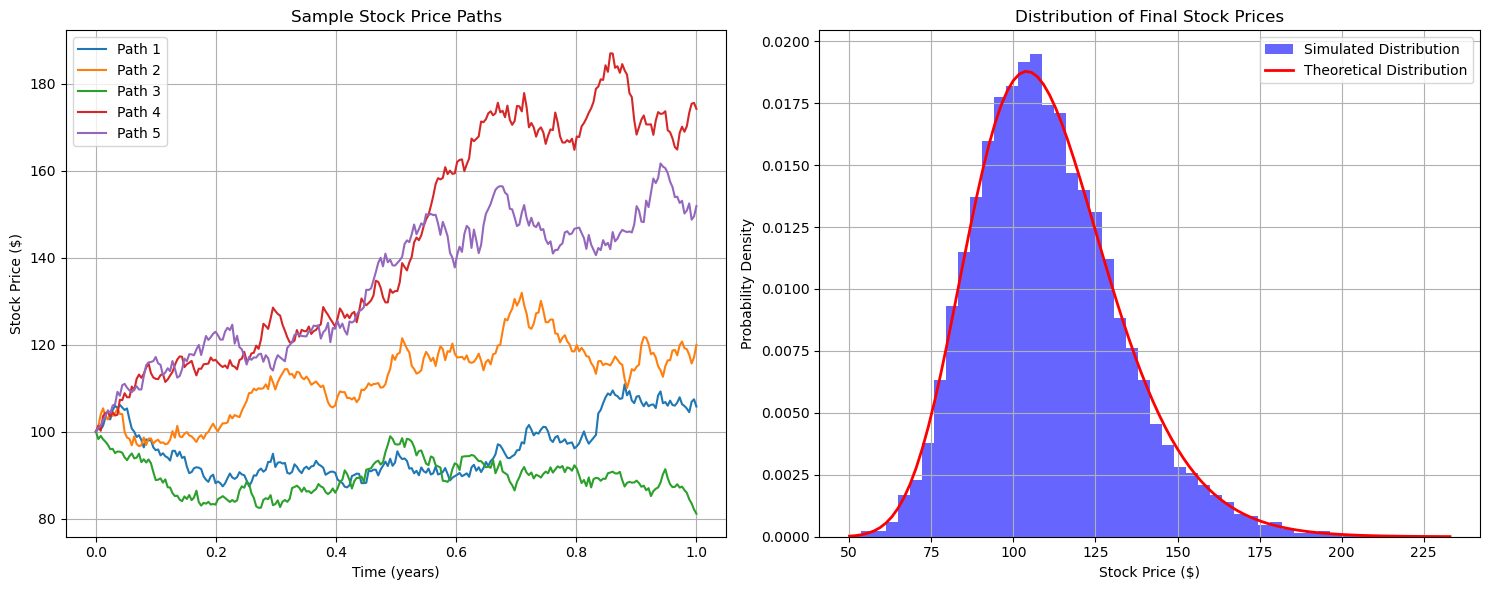


Stock Price Statistics after 1 year:
Initial Price: $100.00
Mean Final Price: $110.26
Median Final Price: $107.88
Standard Deviation: $22.03
5th Percentile: $78.48
95th Percentile: $149.92

Probability of stock being above $100.00: 65.3%

Probability of stock being above $110.00: 46.2%

Probability of stock being above $120.00: 30.0%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Model Parameters
S0 = 100    # Initial stock price
mu = 0.1    # Annual drift (expected return) - e.g., 10% per year
sigma = 0.2 # Annual volatility - e.g., 20% per year
T = 1       # Time horizon in years
N = 252     # Number of trading days (typical number of trading days in a year)
dt = T/N    # Size of time step in years (e.g., 1/252 for daily steps)

# Create time array for plotting
t = np.linspace(0, T, N)

def simulate_gbm_paths(num_paths=5):
    """
    Simulate multiple paths of Geometric Brownian Motion for stock prices.
    
    The stock price follows the equation:
    dS = μSdt + σSdW
    
    Which has the solution:
    S(t) = S(0)exp((μ-σ²/2)dt + σ√dt * Z), where Z ~ N(0,1)
    
    Parameters:
    num_paths (int): Number of paths to simulate
    
    Returns:
    numpy.array: Array of shape (num_paths, N) containing the simulated paths
    """
    # Generate standard normal random numbers for all paths at once
    # Shape: (num_paths, N-1) because we already know the starting point
    Z = np.random.normal(0, 1, size=(num_paths, N-1))
    
    # Initialize array for stock prices
    # Shape: (num_paths, N)
    S = np.zeros((num_paths, N))
    S[:, 0] = S0  # Set initial price for all paths
    
    # Simulate paths step by step
    for i in range(1, N):
        # Implementation of the GBM solution formula
        # The exp() term contains:
        # 1. (mu - 0.5 * sigma**2) * dt : the drift term adjusted for Itô's correction
        # 2. sigma * np.sqrt(dt) * Z : the random shock term
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1])
    
    return S

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot: Sample paths
plt.subplot(1, 2, 1)
paths = simulate_gbm_paths(5)  # Simulate 5 sample paths
for i in range(len(paths)):
    plt.plot(t, paths[i], label=f'Path {i+1}')
plt.title('Sample Stock Price Paths')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)

# Second subplot: Distribution of final prices
plt.subplot(1, 2, 2)

# Simulate many paths for a good distribution approximation
many_paths = simulate_gbm_paths(10000)
final_prices = many_paths[:, -1]  # Get only the final prices

# Create histogram of final prices
plt.hist(final_prices, bins=50, density=True, alpha=0.6, 
         color='blue', label='Simulated Distribution')

# Calculate and plot the theoretical lognormal distribution
x = np.linspace(min(final_prices), max(final_prices), 100)
# Parameters for the lognormal distribution
mu_log = np.log(S0) + (mu - 0.5 * sigma**2) * T
sigma_log = sigma * np.sqrt(T)
# Probability density function of lognormal distribution
pdf = (1/(x * sigma_log * np.sqrt(2*np.pi))) * \
      np.exp(-(np.log(x) - mu_log)**2 / (2 * sigma_log**2))
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical Distribution')

plt.title('Distribution of Final Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and display useful statistics
print(f"\nStock Price Statistics after {T} year:")
print(f"Initial Price: ${S0:.2f}")
print(f"Mean Final Price: ${np.mean(final_prices):.2f}")
print(f"Median Final Price: ${np.median(final_prices):.2f}")
print(f"Standard Deviation: ${np.std(final_prices):.2f}")
print(f"5th Percentile: ${np.percentile(final_prices, 5):.2f}")
print(f"95th Percentile: ${np.percentile(final_prices, 95):.2f}")

# Calculate probabilities of stock being above certain thresholds
target_prices = [S0, S0*1.1, S0*1.2]  # Original price, 10% up, 20% up
for target in target_prices:
    prob = np.mean(final_prices > target) * 100
    print(f"\nProbability of stock being above ${target:.2f}: {prob:.1f}%")

In [8]:
many_paths = simulate_gbm_paths(10000)
many_paths.shape

(10000, 252)

In [7]:
final_prices = many_paths[:, -1]  # Get only the final prices
final_prices

array([116.60965133, 104.29451366, 138.9286956 , ...,  82.58378651,
       106.20874085, 112.80660327])

## how changing parameters affects the distributions


Scenario: Base Case (μ=10%, σ=20%)
Mean Final Price: $110.42
Median Final Price: $107.89
Standard Deviation: $21.60
90% Price Range: $78.01 to $149.95
Probability of Gain: 67.2%

Scenario: High Drift (μ=30%, σ=20%)
Mean Final Price: $133.75
Median Final Price: $132.14
Standard Deviation: $27.40
90% Price Range: $94.38 to $183.64
Probability of Gain: 89.9%

Scenario: Negative Drift (μ=-10%, σ=20%)
Mean Final Price: $90.70
Median Final Price: $89.27
Standard Deviation: $18.71
90% Price Range: $64.27 to $123.87
Probability of Gain: 27.3%

Scenario: High Volatility (μ=10%, σ=40%)
Mean Final Price: $108.17
Median Final Price: $98.97
Standard Deviation: $46.54
90% Price Range: $52.43 to $194.33
Probability of Gain: 48.6%


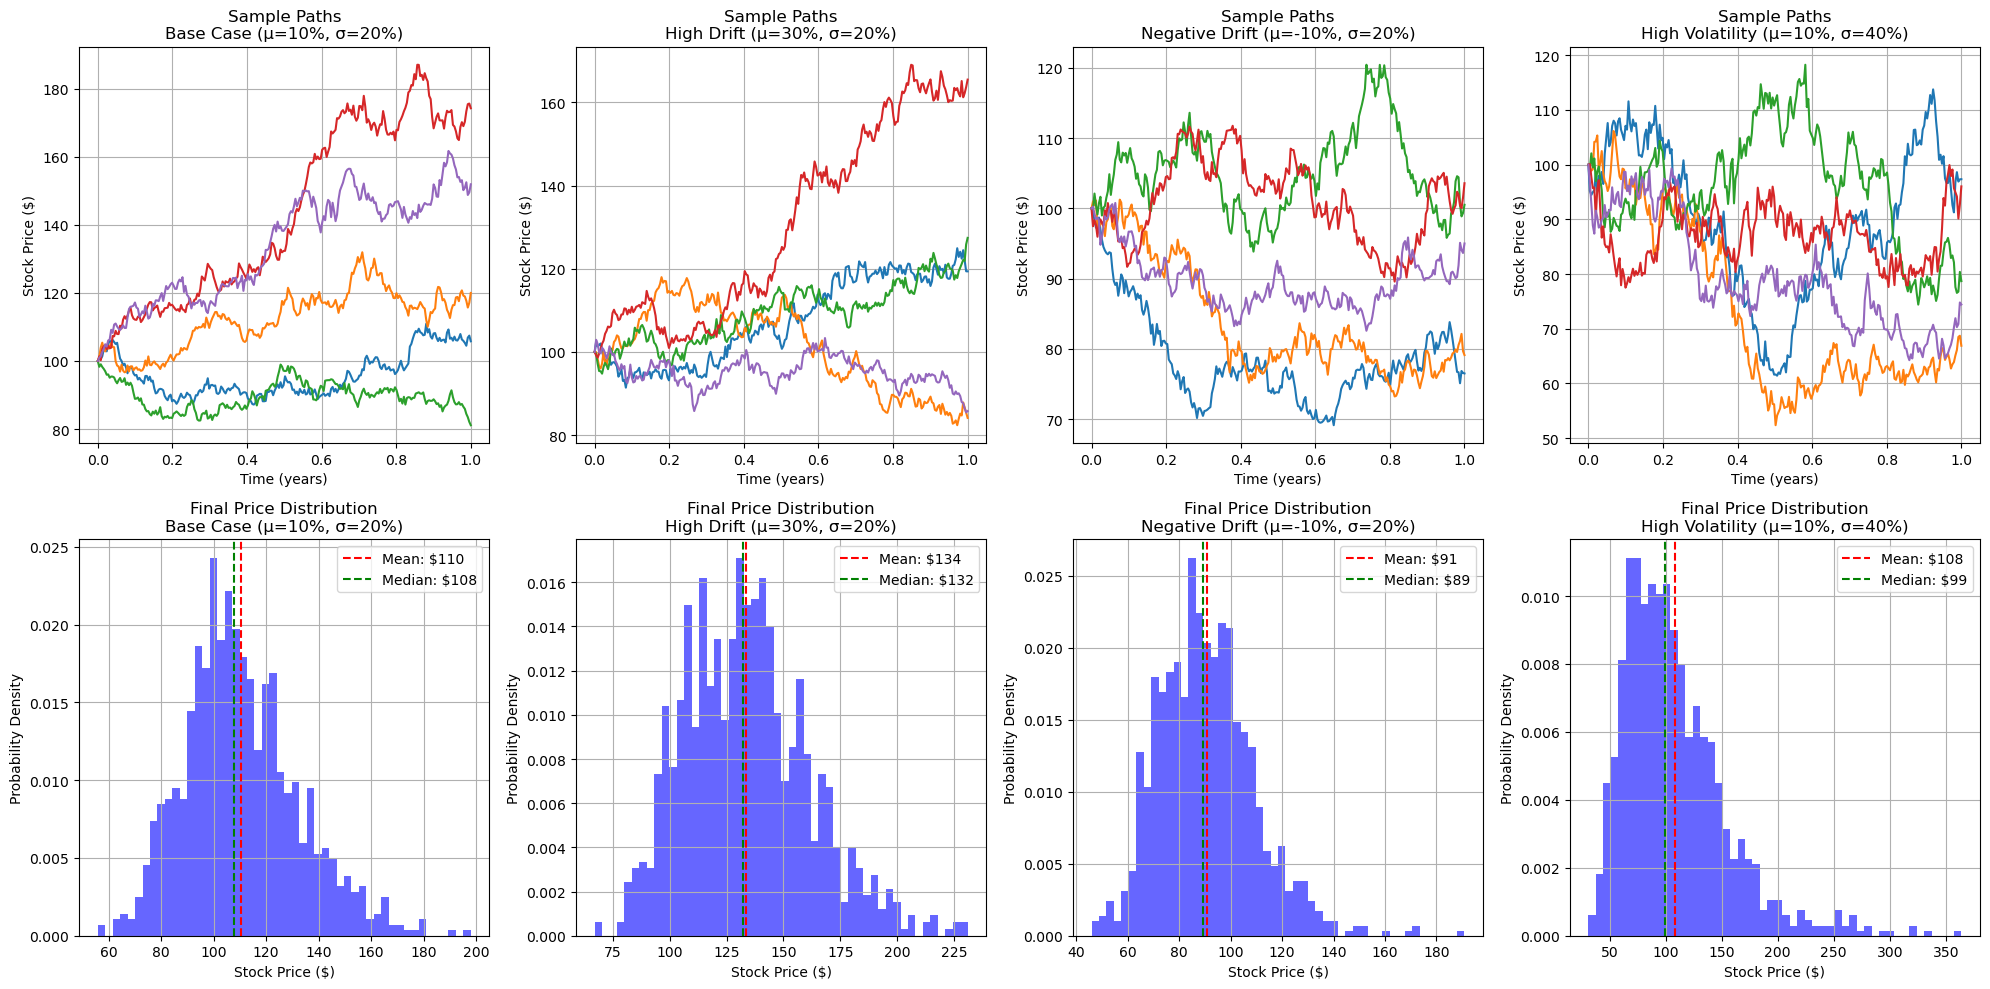

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Base parameters
S0 = 100    # Initial stock price
T = 1       # Time horizon (1 year)
N = 252     # Number of trading days
dt = T/N    # Time step

def simulate_gbm_paths(mu, sigma, num_paths=1000):
    """
    Simulate GBM paths with given drift and volatility parameters
    """
    Z = np.random.normal(0, 1, size=(num_paths, N-1))
    S = np.zeros((num_paths, N))
    S[:, 0] = S0
    
    for i in range(1, N):
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1])
    
    return S

# Create scenarios to compare
scenarios = [
    {'mu': 0.1, 'sigma': 0.2, 'label': 'Base Case (μ=10%, σ=20%)'},
    {'mu': 0.3, 'sigma': 0.2, 'label': 'High Drift (μ=30%, σ=20%)'},
    {'mu': -0.1, 'sigma': 0.2, 'label': 'Negative Drift (μ=-10%, σ=20%)'},
    {'mu': 0.1, 'sigma': 0.4, 'label': 'High Volatility (μ=10%, σ=40%)'},
]

# Create figure
plt.figure(figsize=(20, 10))

# Plot for each scenario
for idx, scenario in enumerate(scenarios, 1):
    paths = simulate_gbm_paths(scenario['mu'], scenario['sigma'])
    
    # Sample paths subplot
    plt.subplot(2, 4, idx)
    t = np.linspace(0, T, N)
    for i in range(5):  # Plot 5 sample paths
        plt.plot(t, paths[i])
    plt.title(f"Sample Paths\n{scenario['label']}")
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    
    # Distribution subplot
    plt.subplot(2, 4, idx + 4)
    final_prices = paths[:, -1]
    
    # Plot histogram
    plt.hist(final_prices, bins=50, density=True, alpha=0.6, color='blue')
    
    # Calculate and display statistics
    mean_price = np.mean(final_prices)
    median_price = np.median(final_prices)
    std_price = np.std(final_prices)
    percentile_5 = np.percentile(final_prices, 5)
    percentile_95 = np.percentile(final_prices, 95)
    
    plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.0f}')
    plt.axvline(median_price, color='green', linestyle='--', label=f'Median: ${median_price:.0f}')
    
    plt.title(f"Final Price Distribution\n{scenario['label']}")
    plt.xlabel('Stock Price ($)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    
    # Print statistics
    print(f"\nScenario: {scenario['label']}")
    print(f"Mean Final Price: ${mean_price:.2f}")
    print(f"Median Final Price: ${median_price:.2f}")
    print(f"Standard Deviation: ${std_price:.2f}")
    print(f"90% Price Range: ${percentile_5:.2f} to ${percentile_95:.2f}")
    print(f"Probability of Gain: {100 * np.mean(final_prices > S0):.1f}%")

plt.tight_layout()
plt.show()

Let me explain how each parameter affects the stock price behavior and why this matters for real-world financial decisions:

###  Base Case (μ=10%, σ=20%):
This represents a typical stock with moderate expected return and risk. The distribution shows that:

- Most outcomes cluster around a modest gain
- There's a slight right skew (more extreme positive outcomes than negative)
- The 90% confidence interval gives us a reasonable range of likely outcomes


### High Drift (μ=30%, σ=20%):
When we increase the drift while keeping volatility constant:

- The entire distribution shifts right
- The probability of a gain increases significantly
- The skewness becomes more pronounced
- Think of this as a high-growth stock or a strong bull market scenario. However, remember that higher expected returns usually come with higher risks in real markets.

### Negative Drift (μ=-10%, σ=20%):
This could represent a declining market or a distressed stock:

- The distribution shifts left
- Most paths trend downward
- There's still a chance of positive returns due to volatility
- The skewness remains (you can't lose more than 100%, but gains can still be large)


### High Volatility (μ=10%, σ=40%):
This shows what happens when we double the volatility:


- The distribution becomes much wider
- Extreme outcomes become more likely
- The right skew becomes more pronounced
- Individual paths show larger jumps
- This might represent a highly speculative stock or crypto asset.

## Look at specific applications in risk management
We'll explore different risk measures and how they help make better investment decisions.

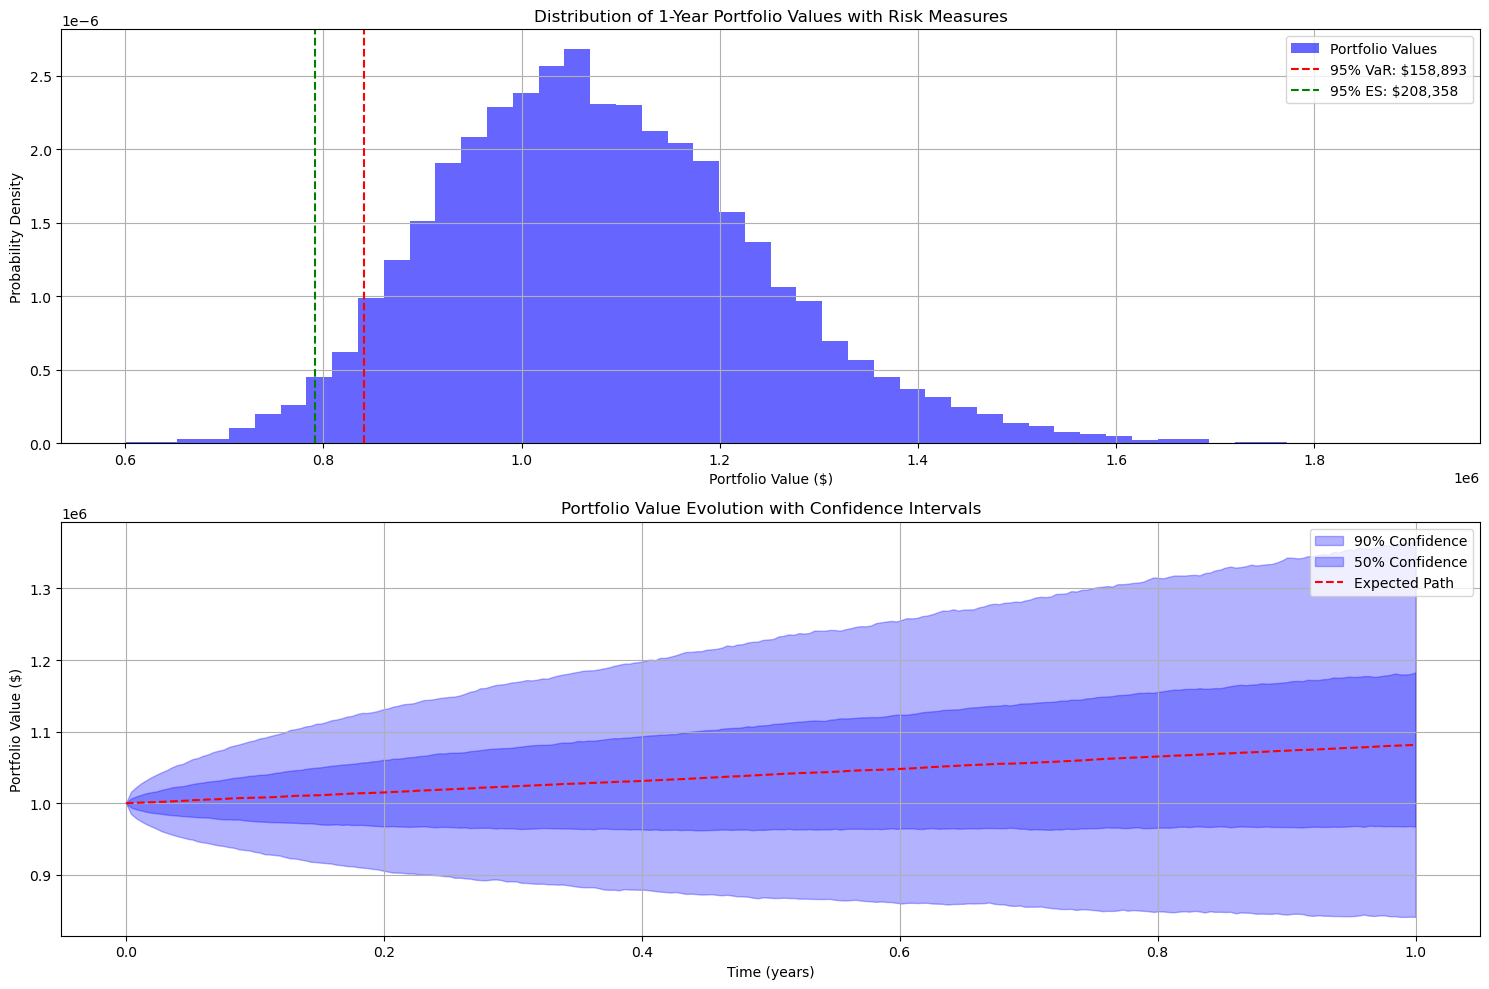


Risk Analysis for $1,000,000 Portfolio:
95% Value at Risk: $158,893
99% Value at Risk: $242,270
95% Expected Shortfall: $208,358
99% Expected Shortfall: $278,086
Maximum Drawdown: -39.9%
Sharpe Ratio: 0.38

Probability Analysis:
Probability of Any Loss: 32.5%
Probability of 10%+ Loss: 12.2%
Probability of 20%+ Gain: 21.7%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
S0 = 1000000  # Initial portfolio value ($1M)
mu = 0.08     # Expected annual return (8%)
sigma = 0.15  # Annual volatility (15%)
T = 1         # Time horizon (1 year)
N = 252       # Trading days
dt = T/N      # Time step

def simulate_portfolio(num_paths=10000):
    """
    Simulate portfolio values using GBM
    """
    Z = np.random.normal(0, 1, size=(num_paths, N-1))
    S = np.zeros((num_paths, N))
    S[:, 0] = S0
    
    for i in range(1, N):
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1])
    
    return S

def calculate_risk_metrics(final_values, initial_value):
    """
    Calculate various risk metrics
    """
    returns = (final_values - initial_value) / initial_value
    
    # Value at Risk (VaR)
    var_95 = np.percentile(final_values, 5)
    var_99 = np.percentile(final_values, 1)
    
    # Expected Shortfall (CVaR)
    es_95 = np.mean(final_values[final_values <= var_95])
    es_99 = np.mean(final_values[final_values <= var_99])
    
    # Maximum Drawdown
    max_drawdown = np.min((final_values - initial_value) / initial_value)
    
    # Sharpe Ratio (assuming risk-free rate = 2%)
    rf = 0.02
    sharpe = (np.mean(returns) - rf) / np.std(returns)
    
    return {
        'VaR_95': initial_value - var_95,
        'VaR_99': initial_value - var_99,
        'ES_95': initial_value - es_95,
        'ES_99': initial_value - es_99,
        'Max_Drawdown': max_drawdown,
        'Sharpe': sharpe
    }

# Simulate portfolio values
portfolio_paths = simulate_portfolio()
final_values = portfolio_paths[:, -1]

# Calculate risk metrics
risk_metrics = calculate_risk_metrics(final_values, S0)

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Final Portfolio Values with Risk Measures
plt.subplot(2, 1, 1)
plt.hist(final_values, bins=50, density=True, alpha=0.6, color='blue', label='Portfolio Values')
plt.axvline(S0 - risk_metrics['VaR_95'], color='red', linestyle='--', 
            label=f"95% VaR: ${risk_metrics['VaR_95']:,.0f}")
plt.axvline(S0 - risk_metrics['ES_95'], color='green', linestyle='--',
            label=f"95% ES: ${risk_metrics['ES_95']:,.0f}")
plt.title('Distribution of 1-Year Portfolio Values with Risk Measures')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot 2: Sample Paths with Confidence Intervals
plt.subplot(2, 1, 2)
t = np.linspace(0, T, N)

# Plot confidence intervals
percentiles = np.percentile(portfolio_paths, [5, 25, 75, 95], axis=0)
plt.fill_between(t, percentiles[0], percentiles[3], alpha=0.3, color='blue', label='90% Confidence')
plt.fill_between(t, percentiles[1], percentiles[2], alpha=0.3, color='blue', label='50% Confidence')

# Plot mean path
mean_path = np.mean(portfolio_paths, axis=0)
plt.plot(t, mean_path, 'r--', label='Expected Path')

plt.title('Portfolio Value Evolution with Confidence Intervals')
plt.xlabel('Time (years)')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed risk analysis
print(f"\nRisk Analysis for ${S0:,.0f} Portfolio:")
print(f"95% Value at Risk: ${risk_metrics['VaR_95']:,.0f}")
print(f"99% Value at Risk: ${risk_metrics['VaR_99']:,.0f}")
print(f"95% Expected Shortfall: ${risk_metrics['ES_95']:,.0f}")
print(f"99% Expected Shortfall: ${risk_metrics['ES_99']:,.0f}")
print(f"Maximum Drawdown: {risk_metrics['Max_Drawdown']*100:.1f}%")
print(f"Sharpe Ratio: {risk_metrics['Sharpe']:.2f}")

# Calculate probability of various scenarios
prob_loss = np.mean(final_values < S0) * 100
prob_10_loss = np.mean(final_values < S0 * 0.9) * 100
prob_20_gain = np.mean(final_values > S0 * 1.2) * 100

print("\nProbability Analysis:")
print(f"Probability of Any Loss: {prob_loss:.1f}%")
print(f"Probability of 10%+ Loss: {prob_10_loss:.1f}%")
print(f"Probability of 20%+ Gain: {prob_20_gain:.1f}%")

### Value at Risk (VaR):
Think of VaR as answering the question: *"How bad could things get in a normal bad scenario?"* It tells us the loss threshold that we expect to exceed only a small percentage of the time. For example, if our 95% VaR is $200,000, this means:


- In normal market conditions, we expect to lose more than $200,000 only 5% of the time
- We can tell stakeholders: "We're 95% confident our losses won't exceed $200,000 over our time horizon"

### Expected Shortfall (ES) or Conditional VaR:
ES goes a step further than VaR by asking: "When things do go badly, how bad do they typically get?" It's the average loss in our worst scenarios. This is particularly important because:


- It captures the severity of tail events better than VaR
- It gives us a more conservative risk measure for extreme events
- It helps in stress testing and scenario planning

 # Advanced Stock Price Models: Beyond Geometric Brownian Motion
 
 The key limitations of GBM we need to address are that it assumes constant volatility, continuous price changes, and normally distributed returns. In reality, markets show **volatility clustering**, **sudden jumps**, and **fat-tailed** distributions.


## 1. The Heston Stochastic Volatility Model

The Heston model represents a significant advancement over GBM by addressing its core limitation: the assumption of constant volatility. This model introduces a separate stochastic process for volatility itself, creating a more realistic representation of market dynamics.

### Key Features

The model is defined by two coupled stochastic differential equations:

For the stock price:
$$ dS_t = \mu S_t dt + \sqrt{v_t}S_t dW^1_t $$

For the variance process:
$$ dv_t = \kappa(\theta - v_t)dt + \xi\sqrt{v_t}dW^2_t $$

where:
- $v_t$ represents the variance (squared volatility)
- $\kappa$ controls the speed of mean reversion
- $\theta$ is the long-term variance level
- $\xi$ is the volatility of volatility
- $dW^1_t$ and $dW^2_t$ are correlated Brownian motions with correlation $\rho$

### Model Characteristics

1. Mean-Reverting Volatility:
   - Volatility tends to return to its long-term average $\theta$
   - The speed of reversion is controlled by $\kappa$
   - This matches empirical observations of market behavior

2. Leverage Effect:
   - Typically $\rho < 0$, capturing negative correlation between returns and volatility
   - Explains why market drops often coincide with volatility spikes

## 2. The Merton Jump-Diffusion Model

This model enhances GBM by incorporating discontinuous price movements, better reflecting real market behavior.

### Mathematical Formulation

The stock price follows:
$$ dS_t = (\mu - \lambda\kappa)S_t dt + \sigma S_t dW_t + S_t dJ_t $$

where:
- $\lambda$ is the jump intensity (average number of jumps per unit time)
- $\kappa$ is the expected jump size
- $J_t$ is a compound Poisson process

### Key Components

1. Continuous Component:
   - Standard GBM dynamics for normal market conditions
   - Captures small, continuous price movements

2. Jump Component:
   - Poisson process determines jump timing
   - Jump sizes follow a normal distribution
   - Models sudden market movements

## 3. Key Improvements Over GBM

### Volatility Clustering
The Heston model captures the empirical observation that:
$$ \mathbb{E}[v_{t+\Delta t}|v_t] = \theta + (\theta - v_t)e^{-\kappa\Delta t} $$

This creates periods of:
- Persistent high volatility during market stress
- Sustained low volatility during calm periods

### Fat-Tailed Returns
Both models generate excess kurtosis through different mechanisms:
1. Heston: Time-varying volatility creates mixture of normal distributions
2. Merton: Direct addition of jumps adds mass to distribution tails

## 4. Practical Applications

### Option Pricing
The models provide closed-form solutions for European options through characteristic functions:
$$ C(S_t, K, T) = S_tP_1 - Ke^{-rT}P_2 $$
where $P_1$ and $P_2$ are risk-neutral probabilities computed via Fourier transforms.

### Risk Management
Enhanced ability to compute risk metrics:

1. Value at Risk (VaR):
   $$ P(S_T \leq \text{VaR}_\alpha) = \alpha $$

2. Expected Shortfall (ES):
   $$ \text{ES}_\alpha = \mathbb{E}[S_T|S_T \leq \text{VaR}_\alpha] $$

### Model Limitations

While more sophisticated, these models introduce:
1. Additional parameters requiring estimation
2. Increased computational complexity
3. Model risk due to specification uncertainty

The choice of model should balance:
$$ \text{Model Complexity} \leftrightarrow \text{Practical Usability} $$

## Further Considerations

These models form the foundation for even more sophisticated approaches:
- Rough volatility models capturing long-memory effects
- Regime-switching models for different market states
- Multi-factor stochastic volatility models

The key is selecting the appropriate level of complexity for your specific application while maintaining mathematical tractability and practical implementability.

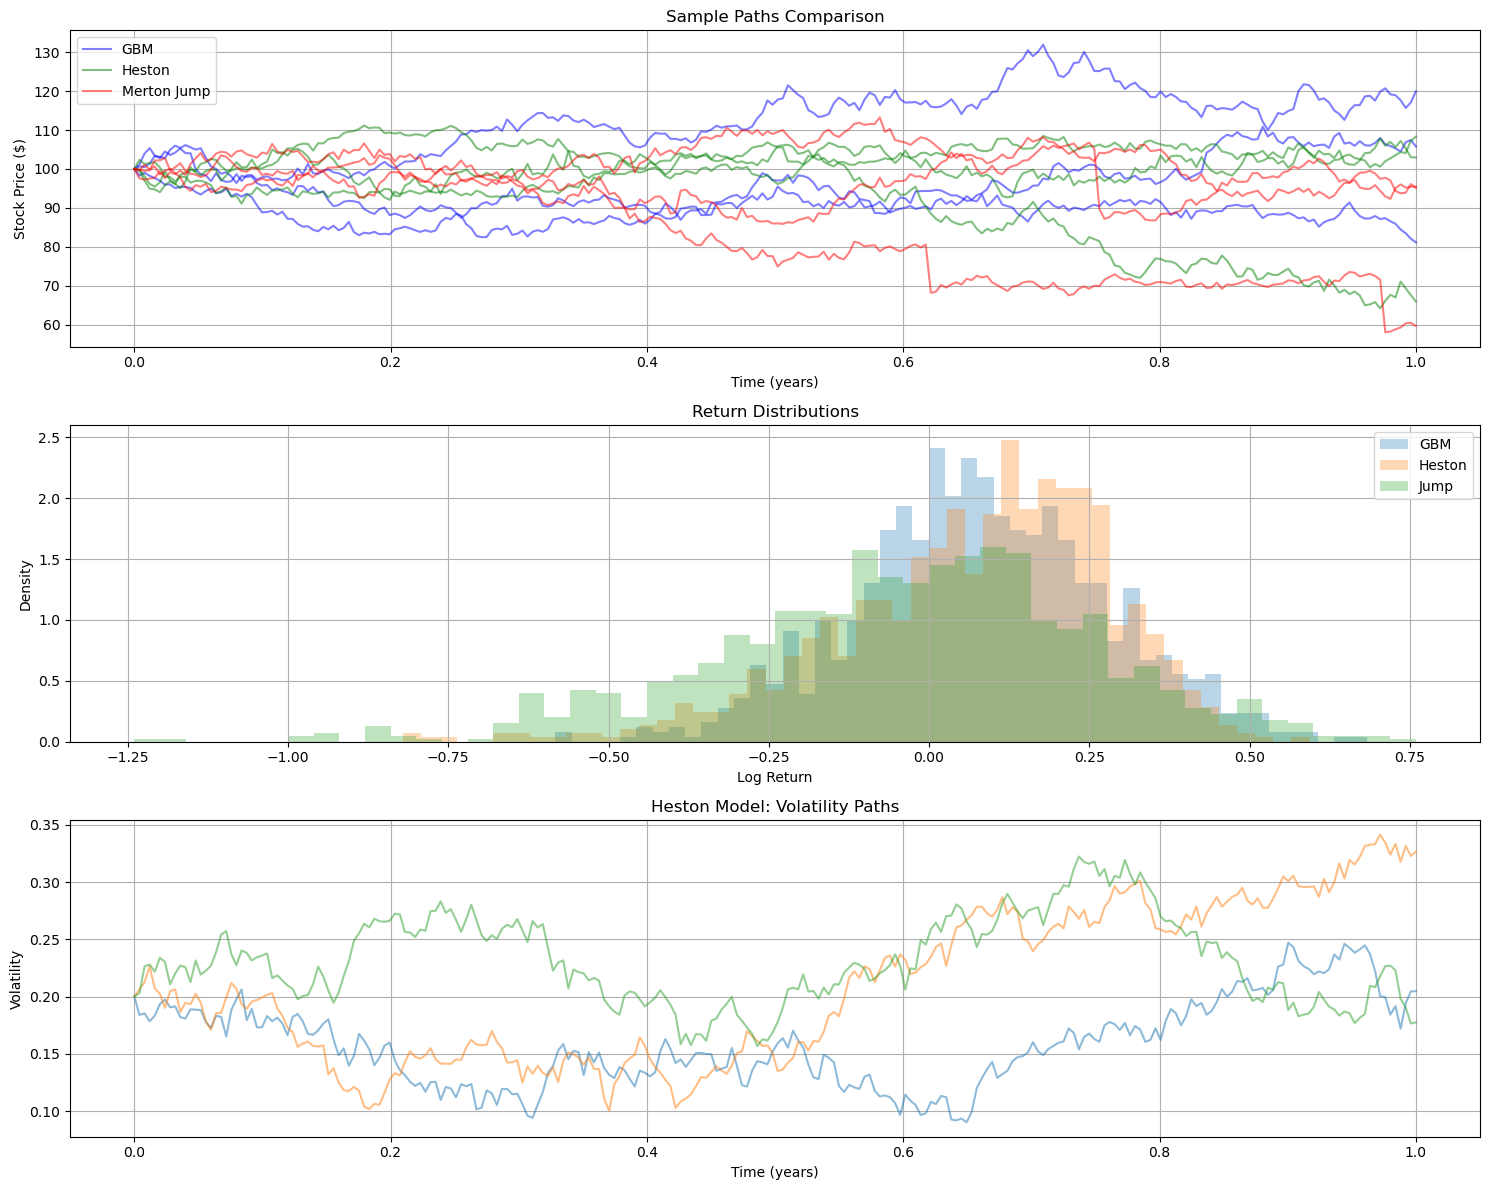


GBM Statistics:
Mean Return: 0.080
Volatility: 0.194
Skewness: -0.036
Excess Kurtosis: 0.034

Heston Statistics:
Mean Return: 0.070
Volatility: 0.213
Skewness: -0.814
Excess Kurtosis: 0.952

Jump Statistics:
Mean Return: -0.037
Volatility: 0.291
Skewness: -0.423
Excess Kurtosis: 0.570


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Common parameters
S0 = 100        # Initial stock price
T = 1           # Time horizon (1 year)
N = 252         # Number of trading days
dt = T/N        # Time step

def simulate_gbm(mu=0.1, sigma=0.2, num_paths=1000):
    """
    Standard GBM simulation for comparison
    """
    Z = np.random.normal(0, 1, size=(num_paths, N-1))
    S = np.zeros((num_paths, N))
    S[:, 0] = S0
    
    for i in range(1, N):
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1])
    return S

def simulate_heston(v0=0.04, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7, mu=0.1, num_paths=1000):
    """
    Heston stochastic volatility model:
    dS = μSdt + √vSdW₁
    dv = κ(θ-v)dt + ξ√vdW₂
    where dW₁ and dW₂ have correlation ρ
    """
    # Generate correlated Brownian motions
    Z1 = np.random.normal(0, 1, size=(num_paths, N-1))
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, size=(num_paths, N-1))
    
    # Initialize arrays
    S = np.zeros((num_paths, N))
    v = np.zeros((num_paths, N))
    S[:, 0] = S0
    v[:, 0] = v0
    
    # Simulate paths
    for i in range(1, N):
        # Ensure variance stays positive
        v[:, i-1] = np.maximum(v[:, i-1], 0)
        
        # Update variance
        v[:, i] = v[:, i-1] + kappa * (theta - v[:, i-1]) * dt + \
                  xi * np.sqrt(v[:, i-1] * dt) * Z2[:, i-1]
        
        # Update stock price
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * v[:, i-1]) * dt + \
                  np.sqrt(v[:, i-1] * dt) * Z1[:, i-1])
    
    return S, v

def simulate_merton_jump(mu=0.1, sigma=0.2, lambda_jump=1.0, 
                        mu_jump=-0.1, sigma_jump=0.2, num_paths=1000):
    """
    Merton jump-diffusion model:
    Adds random jumps to GBM following a Poisson process
    """
    # Simulate GBM component
    Z = np.random.normal(0, 1, size=(num_paths, N-1))
    S = np.zeros((num_paths, N))
    S[:, 0] = S0
    
    # Generate jumps for each time step
    jumps = np.random.poisson(lambda_jump * dt, size=(num_paths, N-1))
    jump_sizes = np.random.normal(mu_jump, sigma_jump, size=(num_paths, N-1))
    
    # Simulate paths with jumps
    for i in range(1, N):
        diffusion = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1]
        jump_component = jumps[:, i-1] * jump_sizes[:, i-1]
        S[:, i] = S[:, i-1] * np.exp(diffusion + jump_component)
    
    return S

# Simulate paths using different models
gbm_paths = simulate_gbm()
heston_paths, heston_vol = simulate_heston()
jump_paths = simulate_merton_jump()

# Create visualization
plt.figure(figsize=(15, 12))

# Plot 1: Sample paths comparison
plt.subplot(3, 1, 1)
t = np.linspace(0, T, N)
for model, paths, label, color in [
    (gbm_paths, 3, 'GBM', 'blue'),
    (heston_paths, 3, 'Heston', 'green'),
    (jump_paths, 3, 'Merton Jump', 'red')
]:
    for i in range(paths):
        plt.plot(t, model[i], alpha=0.5, color=color, label=label if i==0 else "")

plt.title('Sample Paths Comparison')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)

# Plot 2: Return distributions
plt.subplot(3, 1, 2)
returns = {
    'GBM': np.log(gbm_paths[:, -1] / S0),
    'Heston': np.log(heston_paths[:, -1] / S0),
    'Jump': np.log(jump_paths[:, -1] / S0)
}

for model, ret in returns.items():
    plt.hist(ret, bins=50, density=True, alpha=0.3, label=model)
    
plt.title('Return Distributions')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Plot 3: Heston model volatility paths
plt.subplot(3, 1, 3)
for i in range(3):
    plt.plot(t, np.sqrt(heston_vol[i]), alpha=0.5)
plt.title('Heston Model: Volatility Paths')
plt.xlabel('Time (years)')
plt.ylabel('Volatility')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistical analysis
def analyze_returns(returns, model_name):
    print(f"\n{model_name} Statistics:")
    print(f"Mean Return: {np.mean(returns):.3f}")
    print(f"Volatility: {np.std(returns):.3f}")
    print(f"Skewness: {stats.skew(returns):.3f}")
    print(f"Excess Kurtosis: {stats.kurtosis(returns):.3f}")
    
for model, ret in returns.items():
    analyze_returns(ret, model)

# Solving Coupled Geometric Brownian Motions

## 1. Theoretical Framework

### Coupled GBM Equations
We start with two correlated assets following Geometric Brownian Motion (GBM) processes:

$$ dS_1 = \mu_1 S_1 dt + \sigma_1 S_1 dW_1 $$
$$ dS_2 = \mu_2 S_2 dt + \sigma_2 S_2 dW_2 $$

Here:
- $S_1$, $S_2$ are asset prices.
- $\mu_1$, $\mu_2$ are drift terms.
- $\sigma_1$, $\sigma_2$ are volatility terms.
- $dW_1$, $dW_2$ are correlated Brownian motions such that:

$$ dW_1 dW_2 = \rho dt $$

where $\rho$ is the correlation coefficient.

---

## 2. The Cholesky Decomposition Approach

### 2.1 Correlation Matrix
To simulate the processes, we construct the correlation matrix for the Brownian motions:

$$ \Sigma = \begin{pmatrix} 
1 & \rho \\
\rho & 1
\end{pmatrix} $$

### 2.2 Cholesky Decomposition
The Cholesky decomposition allows us to decompose $\Sigma$ into $LL^T$:

$$ L = \begin{pmatrix}
1 & 0 \\
\rho & \sqrt{1-\rho^2}
\end{pmatrix} $$

Using $L$, we can express the correlated Brownian motions in terms of independent Brownian motions $Z_1$ and $Z_2$:

$$ \begin{pmatrix} W_1(t) \\ W_2(t) \end{pmatrix} = L \begin{pmatrix} Z_1(t) \\ Z_2(t) \end{pmatrix} $$

---

## 3. Surface Evolution

The solutions for $S_1(t)$ and $S_2(t)$ are:

$$ S_1(t) = S_1(0)\exp\left( (\mu_1 - \frac{\sigma_1^2}{2})t + \sigma_1 W_1(t) \right) $$
$$ S_2(t) = S_2(0)\exp\left( (\mu_2 - \frac{\sigma_2^2}{2})t + \sigma_2 W_2(t) \right) $$

This defines the coupled price surface based on the joint evolution of $S_1$ and $S_2$.

---

## 4. Statistical Properties of the Surface

### 4.1 Joint Log-Returns

The log-returns of $(S_1, S_2)$ follow a bivariate normal distribution:

$$ \begin{pmatrix} \ln\frac{S_1(t)}{S_1(0)} \\
\ln\frac{S_2(t)}{S_2(0)} \end{pmatrix} \sim N(\mu, \Sigma_t) $$

where:

$$ \mu = \begin{pmatrix} 
(\mu_1 - \frac{\sigma_1^2}{2})t \\
(\mu_2 - \frac{\sigma_2^2}{2})t
\end{pmatrix}, \quad \Sigma_t = t \begin{pmatrix} 
\sigma_1^2 & \rho \sigma_1 \sigma_2 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2
\end{pmatrix} $$

### 4.2 Covariance of Prices

The covariance between $S_1(t)$ and $S_2(t)$ is given by:

$$ \text{Cov}(S_1(t), S_2(t)) = S_1(0) S_2(0) e^{(\mu_1 + \mu_2)t}(e^{\rho \sigma_1 \sigma_2 t} - 1) $$

---

## 5. Special Cases and Extensions

### 5.1 Perfect Correlation ($\rho = 1$)

In this case:

$$ dW_2 = dW_1 $$

The two processes are perfectly aligned, reducing the system to one dimension.

### 5.2 Zero Correlation ($\rho = 0$)

When $\rho = 0$:

$$ dW_1 dW_2 = 0 $$

The processes evolve independently, with no cross-correlation.

### 5.3 Perfect Negative Correlation ($\rho = -1$)

Here:

$$ dW_2 = -dW_1 $$

This creates perfect hedging opportunities.

---

## 6. Applications to Financial Problems

### 6.1 Multi-Asset Option Pricing

The value $V$ of an option depending on $S_1$ and $S_2$ satisfies the two-dimensional Black-Scholes PDE:

$$ \frac{\partial V}{\partial t} + \frac{1}{2}\sigma_1^2 S_1^2 \frac{\partial^2 V}{\partial S_1^2} + \rho \sigma_1 \sigma_2 S_1 S_2 \frac{\partial^2 V}{\partial S_1 \partial S_2} + \frac{1}{2}\sigma_2^2 S_2^2 \frac{\partial^2 V}{\partial S_2^2} + rS_1 \frac{\partial V}{\partial S_1} + rS_2 \frac{\partial V}{\partial S_2} - rV = 0 $$

### 6.2 Risk Management

#### Delta Hedging

To hedge a portfolio, we need the sensitivities:

$$ \Delta_1 = \frac{\partial V}{\partial S_1}, \quad \Delta_2 = \frac{\partial V}{\partial S_2} $$

#### Correlation Risk

The cross-gamma quantifies the correlation risk:

$$ \Gamma_{12} = \frac{\partial^2 V}{\partial S_1 \partial S_2} $$

---

## 7. Numerical Implementation Considerations

1. **Time Discretization:** Choose a small enough $\Delta t$ to ensure accuracy:
   $$ \Delta t = \frac{T}{N} $$

2. **Monte Carlo Simulation:** Use a sufficiently large number of paths to:
   - Accurately represent joint distributions.
   - Capture rare events in the surface's tails.

3. **Error Analysis:** Evaluate:
   - Discretization error.
   - Monte Carlo variance.
   - Correlation estimation accuracy.

---

## Summary

Coupled GBM processes model the joint dynamics of correlated assets. By leveraging techniques like Cholesky decomposition, we can simulate and analyze these systems for applications in:
- Multi-asset pricing.
- Risk management.
- Portfolio optimization.

Understanding the surface evolution and its statistical properties provides valuable insights for quantitative finance and trading strategies.


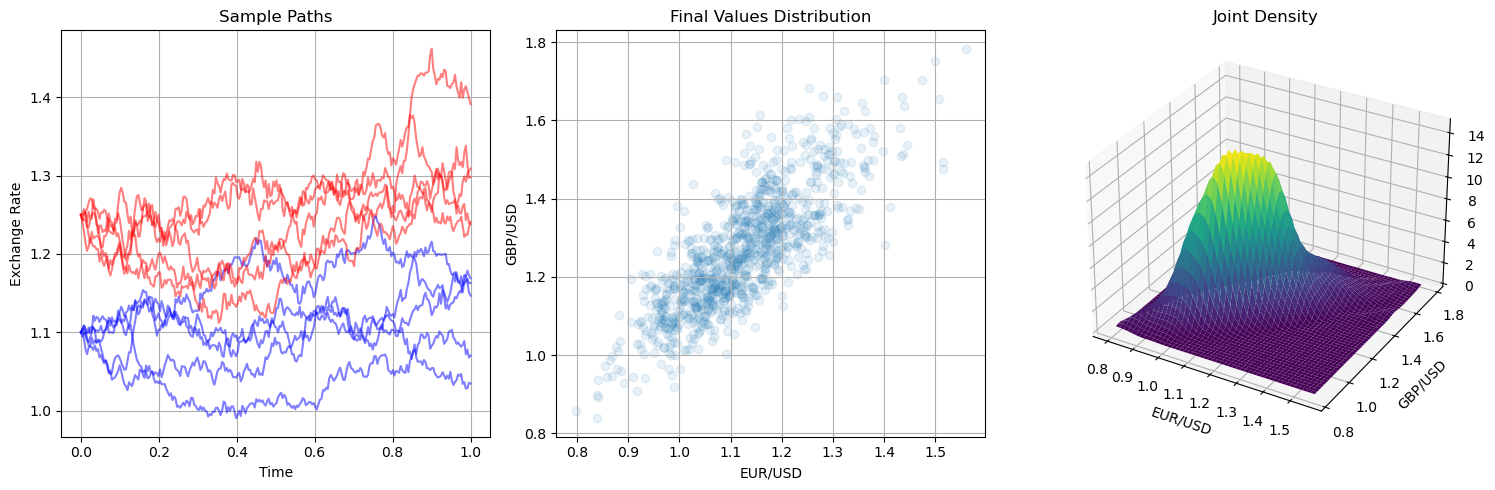


Statistical Analysis:
Realized correlation: 0.804
Target correlation: 0.800

EUR/USD Final Price Statistics:
Mean: 1.1224
Std Dev: 0.1135

GBP/USD Final Price Statistics:
Mean: 1.2647
Std Dev: 0.1485


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Parameters
S1_0 = 1.10    # Initial EUR/USD
S2_0 = 1.25    # Initial GBP/USD
mu1 = 0.02     # EUR/USD drift
mu2 = 0.01     # GBP/USD drift
sigma1 = 0.1   # EUR/USD volatility
sigma2 = 0.12  # GBP/USD volatility
rho = 0.8      # Correlation coefficient
T = 1          # Time horizon
N = 252        # Number of time steps
M = 1000       # Number of paths

def simulate_correlated_gbm():
    dt = T/N
    # Generate correlated Brownian motions
    Z1 = np.random.normal(0, 1, (M, N-1))
    Z2 = np.random.normal(0, 1, (M, N-1))
    
    # Apply Cholesky decomposition
    W1 = Z1
    W2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2
    
    # Initialize arrays for prices
    S1 = np.zeros((M, N))
    S2 = np.zeros((M, N))
    S1[:, 0] = S1_0
    S2[:, 0] = S2_0
    
    # Simulate paths
    for i in range(1, N):
        S1[:, i] = S1[:, i-1] * np.exp((mu1 - 0.5*sigma1**2)*dt + 
                                      sigma1*np.sqrt(dt)*W1[:, i-1])
        S2[:, i] = S2[:, i-1] * np.exp((mu2 - 0.5*sigma2**2)*dt + 
                                      sigma2*np.sqrt(dt)*W2[:, i-1])
    
    return S1, S2

# Simulate
S1, S2 = simulate_correlated_gbm()

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 5))

# Plot 1: Sample paths for both processes
ax1 = fig.add_subplot(131)
t = np.linspace(0, T, N)
for i in range(5):  # Plot first 5 paths
    ax1.plot(t, S1[i], 'b-', alpha=0.5)
    ax1.plot(t, S2[i], 'r-', alpha=0.5)
ax1.set_title('Sample Paths')
ax1.set_xlabel('Time')
ax1.set_ylabel('Exchange Rate')
ax1.grid(True)

# Plot 2: Scatter plot of final values
ax2 = fig.add_subplot(132)
ax2.scatter(S1[:, -1], S2[:, -1], alpha=0.1)
ax2.set_xlabel('EUR/USD')
ax2.set_ylabel('GBP/USD')
ax2.set_title('Final Values Distribution')
ax2.grid(True)

# Plot 3: 3D surface of kernel density estimation
ax3 = fig.add_subplot(133, projection='3d')

# Create grid of points
x = np.linspace(min(S1[:, -1]), max(S1[:, -1]), 50)
y = np.linspace(min(S2[:, -1]), max(S2[:, -1]), 50)
X, Y = np.meshgrid(x, y)

# Calculate kernel density estimation
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([S1[:, -1], S2[:, -1]])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the surface
surf = ax3.plot_surface(X, Y, Z, cmap='viridis')
ax3.set_xlabel('EUR/USD')
ax3.set_ylabel('GBP/USD')
ax3.set_zlabel('Density')
ax3.set_title('Joint Density')

plt.tight_layout()
plt.show()

# Calculate and display statistics
final_returns1 = np.log(S1[:, -1]/S1_0)
final_returns2 = np.log(S2[:, -1]/S2_0)
realized_corr = np.corrcoef(final_returns1, final_returns2)[0,1]

print(f"\nStatistical Analysis:")
print(f"Realized correlation: {realized_corr:.3f}")
print(f"Target correlation: {rho:.3f}")
print(f"\nEUR/USD Final Price Statistics:")
print(f"Mean: {np.mean(S1[:, -1]):.4f}")
print(f"Std Dev: {np.std(S1[:, -1]):.4f}")
print(f"\nGBP/USD Final Price Statistics:")
print(f"Mean: {np.mean(S2[:, -1]):.4f}")
print(f"Std Dev: {np.std(S2[:, -1]):.4f}")